In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('train.csv')
df.head(2)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [4]:
num_columns = df.select_dtypes(exclude='object')
num_columns.head()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
0,0,49.0,NaN,5.0,NaN,NaN,2.0,1.0,2.0,0
1,1,26.0,NaN,4.0,NaN,NaN,3.0,7.0,3.0,1
2,2,33.0,5.0,NaN,8.97,2.0,NaN,3.0,1.0,1
3,3,22.0,NaN,5.0,NaN,NaN,1.0,10.0,1.0,1
4,4,30.0,NaN,1.0,NaN,NaN,1.0,9.0,4.0,0


In [5]:
cat_columns = df.select_dtypes(include='object')
cat_columns.head()

,Name,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
0,Aaradhya,Female,Ludhiana,Working Professional,Chef,More than 8 hours,Healthy,BHM,No,No
1,Vivan,Male,Varanasi,Working Professional,Teacher,Less than 5 hours,Unhealthy,LLB,Yes,No
2,Yuvraj,Male,Visakhapatnam,Student,NaN,5-6 hours,Healthy,B.Pharm,Yes,No
3,Yuvraj,Male,Mumbai,Working Professional,Teacher,Less than 5 hours,Moderate,BBA,Yes,Yes
4,Rhea,Female,Kanpur,Working Professional,Business Analyst,5-6 hours,Unhealthy,BBA,Yes,Yes


In [6]:
cat_columns.drop(columns=['Name','City'],axis=1, inplace=True)
for i in cat_columns:
    print(cat_columns[i].value_counts())

Gender
Male      77464
Female    63236
Name: count, dtype: int64
Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64
Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022
                  ...  
BBA                   1
City Manager          1
FamilyVirar           1
B.Com                 1
Yuvraj                1
Name: count, Length: 64, dtype: int64
Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
1

In [7]:
df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [8]:
correlation = num_columns.corr()
correlation['Depression']

id                    0.003944
Age                  -0.564671
Academic Pressure     0.475037
Work Pressure         0.216634
CGPA                  0.021729
Study Satisfaction   -0.168014
Job Satisfaction     -0.168543
Work/Study Hours      0.191746
Financial Stress      0.227237
Depression            1.000000
Name: Depression, dtype: float64

In [9]:
df.shape

(140700, 20)

In [10]:
df.duplicated().sum()

0

In [11]:
num_columns['Academic Pressure'].fillna(0,inplace=True)
num_columns['Work Pressure'].fillna(0,inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_10664\4220127211.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  num_columns['Academic Pressure'].fillna(0,inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_10664\4220127211.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [12]:
df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [13]:
num_columns['Pressure'] = num_columns['Academic Pressure'] +num_columns['Work Pressure']

In [14]:
num_columns['Pressure'].isnull().sum()

0

In [15]:
correlation = num_columns.corr()

In [16]:
correlation['Depression']

id                    0.003944
Age                  -0.564671
Academic Pressure     0.586630
Work Pressure        -0.258952
CGPA                  0.021729
Study Satisfaction   -0.168014
Job Satisfaction     -0.168543
Work/Study Hours      0.191746
Financial Stress      0.227237
Depression            1.000000
Pressure              0.263156
Name: Depression, dtype: float64

In [17]:
num_columns['Study Satisfaction'].fillna(0,inplace=True)
num_columns['Job Satisfaction'].fillna(0,inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_10664\2621847174.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  num_columns['Study Satisfaction'].fillna(0,inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_10664\2621847174.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [18]:
num_columns['Satisfaction'] = num_columns['Study Satisfaction'] + num_columns['Job Satisfaction']

In [19]:
correlation=num_columns.corr()

In [20]:
correlation['Depression']

id                    0.003944
Age                  -0.564671
Academic Pressure     0.586630
Work Pressure        -0.258952
CGPA                  0.021729
Study Satisfaction    0.418999
Job Satisfaction     -0.434142
Work/Study Hours      0.191746
Financial Stress      0.227237
Depression            1.000000
Pressure              0.263156
Satisfaction         -0.142428
Name: Depression, dtype: float64

In [24]:
num_columns1  = df.select_dtypes(exclude='object')

In [27]:
correlation = num_columns1.corr()
correlation['Depression']

id                    0.003944
Age                  -0.564671
Academic Pressure     0.475037
Work Pressure         0.216634
CGPA                  0.021729
Study Satisfaction   -0.168014
Job Satisfaction     -0.168543
Work/Study Hours      0.191746
Financial Stress      0.227237
Depression            1.000000
Name: Depression, dtype: float64

In [28]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [29]:
df.Gender.value_counts()

Gender
Male      77464
Female    63236
Name: count, dtype: int64

<Axes: xlabel='Gender,Depression'>

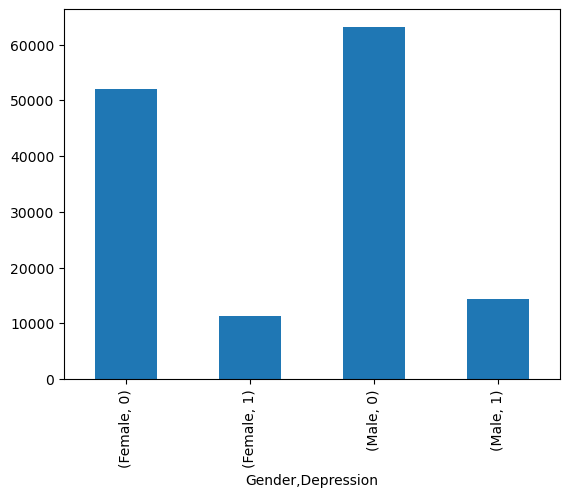

In [44]:
df.groupby(['Gender', 'Depression']).size().plot(kind='bar')

In [45]:
cat_columns.head()

,Gender,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
0,Female,Working Professional,Chef,More than 8 hours,Healthy,BHM,No,No
1,Male,Working Professional,Teacher,Less than 5 hours,Unhealthy,LLB,Yes,No
2,Male,Student,NaN,5-6 hours,Healthy,B.Pharm,Yes,No
3,Male,Working Professional,Teacher,Less than 5 hours,Moderate,BBA,Yes,Yes
4,Female,Working Professional,Business Analyst,5-6 hours,Unhealthy,BBA,Yes,Yes


<Axes: xlabel='Working Professional or Student,Depression'>

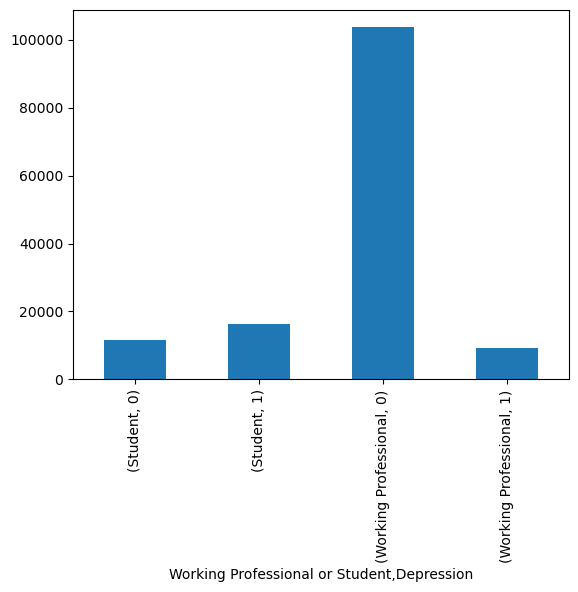

In [51]:
df.groupby(['Working Professional or Student', 'Depression']).size().plot(kind='bar')

In [52]:
cat_columns['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

In [56]:
df = df[df['Dietary Habits'].isin(['Moderate', 'Unhealthy', 'Healthy'])]


In [58]:
df['Dietary Habits'].value_counts()

Dietary Habits
Moderate     49705
Unhealthy    46227
Healthy      44741
Name: count, dtype: int64

<Axes: xlabel='Dietary Habits,Depression'>

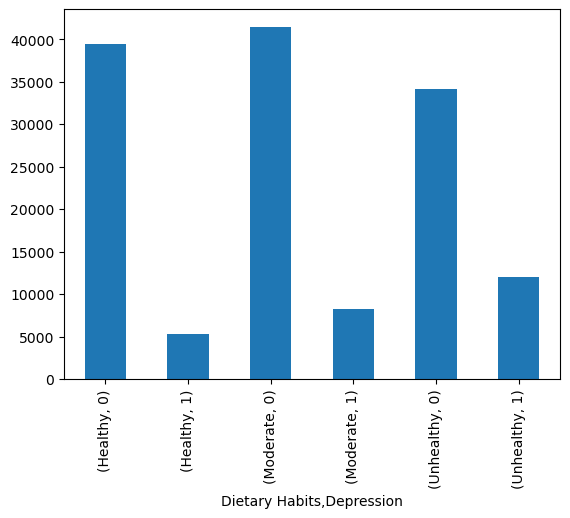

In [63]:
df.groupby(['Dietary Habits', 'Depression']).size().plot(kind='bar')

In [70]:
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38774
7-8 hours            36960
More than 8 hours    32722
5-6 hours            32138
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

In [71]:
df = df[df['Sleep Duration'].isin(['Less than 5 hours', '7-8 hours', 'More than 8 hours','5-6 hours'])]


In [72]:
df.groupby(['Sleep Duration', 'Depression']).size()

Sleep Duration     Depression
5-6 hours          0             26819
                   1              5319
7-8 hours          0             30370
                   1              6590
Less than 5 hours  0             29675
                   1              9099
More than 8 hours  0             28184
                   1              4538
dtype: int64

<Axes: xlabel='Have you ever had suicidal thoughts ?,Depression'>

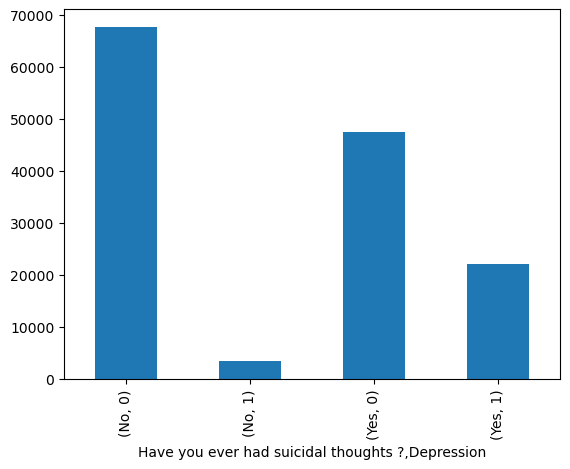

In [74]:
df.groupby(['Have you ever had suicidal thoughts ?', 'Depression']).size().plot(kind='bar')

<Axes: xlabel='Family History of Mental Illness,Depression'>

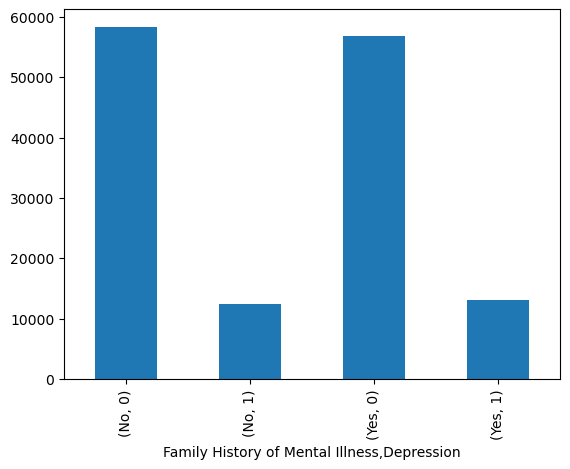

In [76]:
df.groupby(['Family History of Mental Illness', 'Depression']).size().plot(kind='bar')